In [1]:
import cv2
import numpy as np
import os

import datetime
from skimage import io
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline
import glob

print('Done')

Done


In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Adam


# model
model = Sequential()

# first conv layer
# input shape = (img_rows, img_cols, 1)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100,120, 1))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(6, activation='softmax'))

# model summary
optimiser = Adam() 
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()


print('Done')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 118, 32)       320       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 118, 32)       128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 59, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 59, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 57, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 57, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 28, 64)        0

In [3]:
# Loading the Dataset

DATASET_PATH = r'database/'

dataset_path = os.path.join(DATASET_PATH, '*')
import glob
dataset_path = glob.glob(dataset_path)
dataset_path


print('Done')

Done


Done


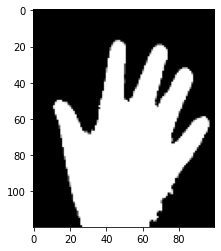

In [8]:
import cv2
image = cv2.imread(r'database/five/five_215.png')
image = cv2.resize(image,(100, 120))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


print('Done')

In [22]:
loaded_images = []
m=1500

list_of_gestures = ['one', 'two', 'three', 'four', 'five', 'blank']

for path in range(0, len(list_of_gestures)):
    dataset_path = "database/" + str(list_of_gestures[path])
    gesture_path = os.path.join(dataset_path, '*')
    print(gesture_path)
    import glob
    gest_path = glob.glob(gesture_path)
    k = 0
    for i in range(0, len(gest_path)):
        if k < m:
            image = cv2.imread(gest_path[i])
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            gray_image = cv2.resize(gray_image,(100, 120))
            loaded_images.append(gray_image)
        k=k+1
print(len(loaded_images))

outputVectors = []
for i in range(0, m):
    outputVectors.append([1, 0, 0, 0, 0, 0])

for i in range(0, m):
    outputVectors.append([0, 1, 0, 0, 0, 0])

for i in range(0, m):
    outputVectors.append([0, 0, 1, 0, 0, 0])
    
for i in range(0, m):
    outputVectors.append([0, 0, 0, 1, 0, 0])
    
for i in range(0, m):
    outputVectors.append([0, 0, 0, 0, 1, 0])

for i in range(0, m):
    outputVectors.append([0, 0, 0, 0, 0, 1])

print(len(outputVectors))


print('Done')

database/one\*
database/two\*
database/three\*
database/four\*
database/five\*
database/blank\*
9000
9000
Done


In [23]:
X = np.asarray(loaded_images)
y = np.asarray(outputVectors)
print(X.shape)
print(y.shape)


print('Done')

(9000, 120, 100)
(9000, 6)
Done


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train = X_train.reshape(X_train.shape[0], 100, 120, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 120, 1)
print(X_train.shape)
print(X_test.shape)


print('Done')

(7200, 100, 120, 1)
(1800, 100, 120, 1)
Done


In [26]:
# Training the model with data
model.fit(X_train, y_train,
          batch_size=128,
          epochs=25,
          verbose=1,
          validation_data=(X_test, y_test))

model.save("numbers.h5")


print('Done')

57/57 [==============================] - 271s 5s/step - loss: 4.2299 - categorical_accuracy: 0.3928 - val_loss: 1.9953 - val_categorical_accuracy: 0.3461
Done


In [27]:
[loss, acc] = model.evaluate(X_test,y_test,verbose=1)
print("Accuracy: " + str(acc))


print('Done')

57/57 [==============================] - 9s 161ms/step - loss: 1.9953 - categorical_accuracy: 0.3461
Accuracy: 0.34611111879348755
Done
